### ЛР 1 Иванчук Иван ВИП-308

In [10]:
import math

import matplotlib.pyplot as plt
import numpy as np

#### Функция для исследования
$f(x) = (1 + x)x + \frac{1} {1 + x^2}$

In [11]:
def f(n):
    return (1 + n) * n + 1 / (1 + n**2)

### Поразрядный поиск

In [12]:
def search(func, l, r, e):
    h = (r - l) / 4
    x0 = l
    y0 = func(x0)
    i = 0
    while abs(h) > e:
        x1 = x0 + h
        y1 = func(x1)
        if func(x0) > func(x1):
            x0 = x1
            y0 = y1
            if l < x0 < r:
                x1 = x0 + h
        if y0 <= func(x1):
            x0 = x1
            h = - h / 4
        i = i + 1
    return [x0, y0, i]

### Золотое сечение

In [13]:
def golden_section(func, l, r, e):
    phi = (1 + math.sqrt(5)) / 2
    resphi = 2 - phi
    x1 = l + resphi * (r - l)
    x2 = r - resphi * (r - l)
    f1 = func(x1)
    f2 = func(x2)
    count = 0
    while True:
        if f1 <= f2:
            r = x2
            x2 = x1
            f2 = f1
            x1 = l + resphi * (r - l)
            f1 = f(x1)
        else:
            l = x1
            x1 = x2
            f1 = f2
            x2 = r - resphi * (r - l)
            f2 = f(x2)
        if abs(r - l) < e:
            break
        count = count + 1
    res = (x1 + x2) / 2
    return [res, f(res), count]

$
    {\bf Условия:} \\
    a = -3 \\ b = 2 \\ \epsilon = 0,00000005 \\ x \in [a, b].
$

In [14]:
a = -3
b = 2
eps = 0.00000005
xs = []
ys = []

#### _Поразрядный поиск_

In [15]:
src = search(f, a, b, eps)
print('x min = ' + str(src[0]), 'y min = ' + str(src[1]), 'iterations: ' + str(src[2]))

x min = -0.7978824824094772 y min = 0.4497506819115449 iterations: 48


#### _Золотое сечение_

In [16]:
selection = golden_section(f, a, b, eps)
print('x min = ' + str(selection[0]), 'y min = ' + str(selection[1]), 'iterations: ' + str(selection[2]))

x min = -0.7978825541984409 y min = 0.44975068191154494 iterations: 38


In [17]:
for x in np.arange(a, b, 0.01):
    xs.append(x)
    ys.append(f(x))

### График функции:

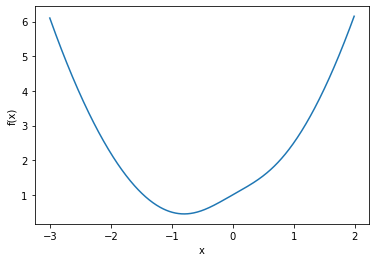

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [18]:
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
plt.figure(figsize=(10, 10), dpi=300)